In [1]:
market <- read.table('./market-1.txt', header=T)

In [2]:
t(market)

ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
X,4.2,8.5,9.3,7.5,6.3,12.2,6.5,10.4,5.8,9.2,7.2,8.5,10.6,13.9,12.7
Y,9.3,18.5,22.8,17.7,14.6,27.9,12.5,25.2,10.8,20.5,14.9,19.2,22.5,28.4,25.6


In [3]:
head(market)

,ID,X,Y
,<int>,<dbl>,<dbl>
1,1,4.2,9.3
2,2,8.5,18.5
3,3,9.3,22.8
4,4,7.5,17.7
5,5,6.3,14.6
6,6,12.2,27.9


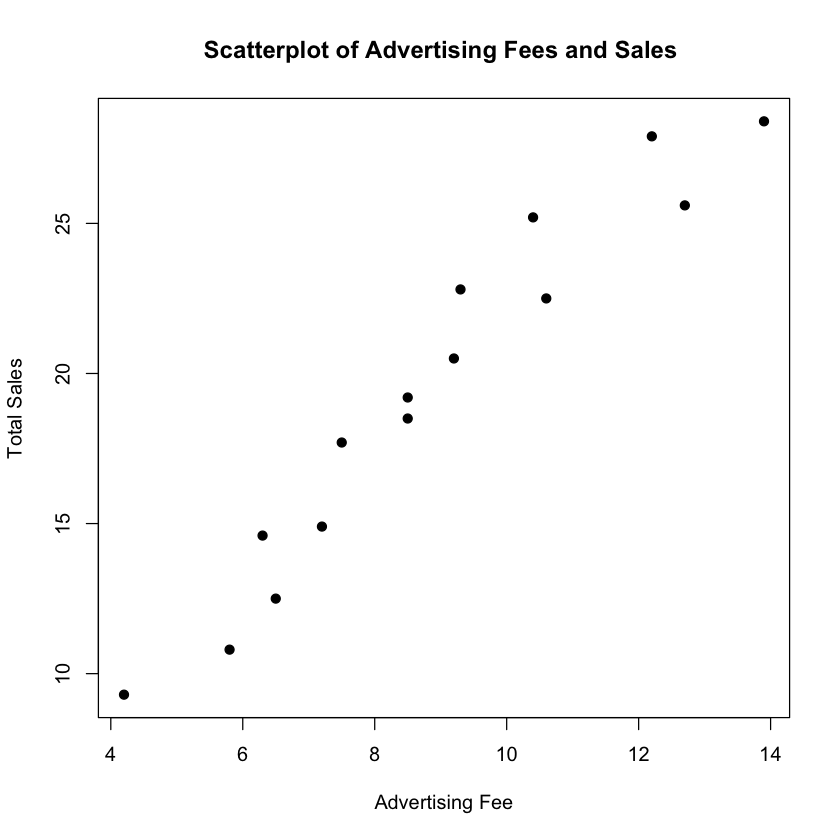

In [4]:
# 광고료 : Advertising Fee
# 총판매액 : Total Sales
# 광고료와 판매액의 산점도 : Scatterplot of Advertising Fees and Sales
plot(market$X, market$Y, xlab='Advertising Fee', ylab='Total Sales', pch=19)
title("Scatterplot of Advertising Fees and Sales ")

In [5]:
# 표본상점의 관고료와 총판매액 자료에 대하여 회귀직선을 구하고, 산점도 위에 회귀직선을 그려보아라.

In [6]:
market.lm <- lm(Y ~ X, data=market)

In [7]:
market.lm


Call:
lm(formula = Y ~ X, data = market)

Coefficients:
(Intercept)            X  
     0.3282       2.1497  


In [8]:
market.lm.summary <- summary(market.lm)
market.lm.summary


Call:
lm(formula = Y ~ X, data = market)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02908 -1.35349 -0.05685  0.98903  2.51517 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.3282     1.4302   0.229    0.822    
X             2.1497     0.1548  13.889 3.55e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.587 on 13 degrees of freedom
Multiple R-squared:  0.9369,	Adjusted R-squared:  0.932 
F-statistic: 192.9 on 1 and 13 DF,  p-value: 3.554e-09


In [9]:
market.lm.summary$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.3282205,1.4302034,0.2294922,8.220576e-01
X,2.1496739,0.1547757,13.8889630,3.553647e-09


In [25]:
# 추정된 회귀식 Ŷ = 0.3282 + 2.1497X
β0 <- market.lm.summary$coefficients[1, 1]
cat('β0 :', β0, '\n')
β1 <- market.lm.summary$coefficients[2, 1]
cat('β1 :', β1)

β0 : 0.3282205 
β1 : 2.149674

integer(0)

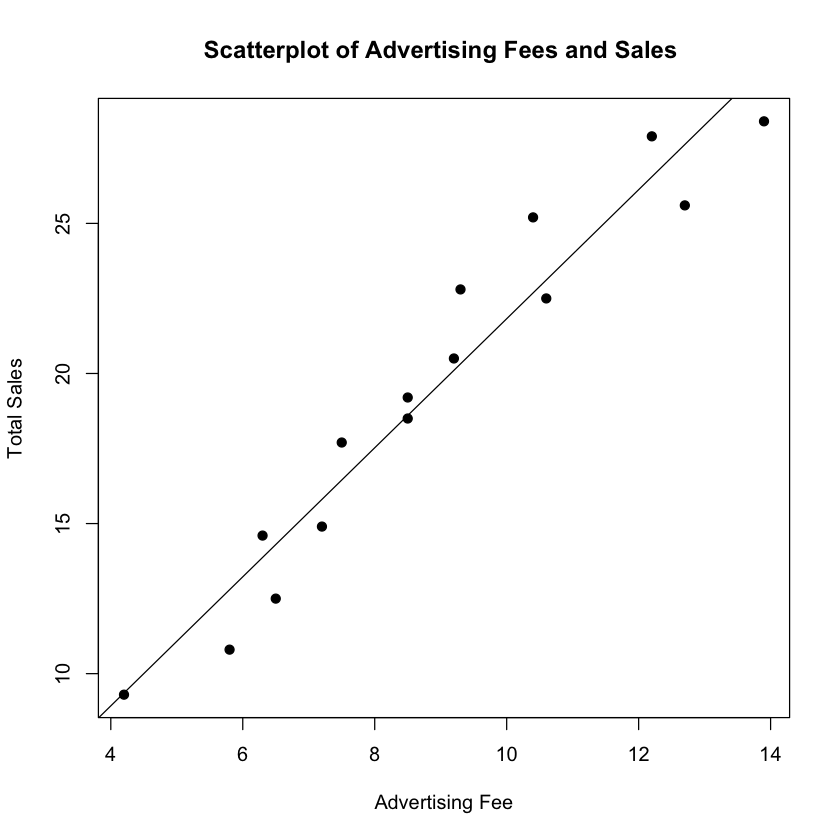

In [26]:
# 광고료 : Advertising Fee
# 총판매액 : Total Sales
# 광고료와 판매액의 산점도 : Scatterplot of Advertising Fees and Sales
plot(market$X, market$Y, xlab='Advertising Fee', ylab='Total Sales', pch=19)
title("Scatterplot of Advertising Fees and Sales ")
abline(market.lm)
# identify는 Rstudio에서 적용된다. 이미지는 아래 참조
identify(market$X, market$Y)

In [27]:
# install.packages('imager')
# install.packages('magrittr')
library(imager)

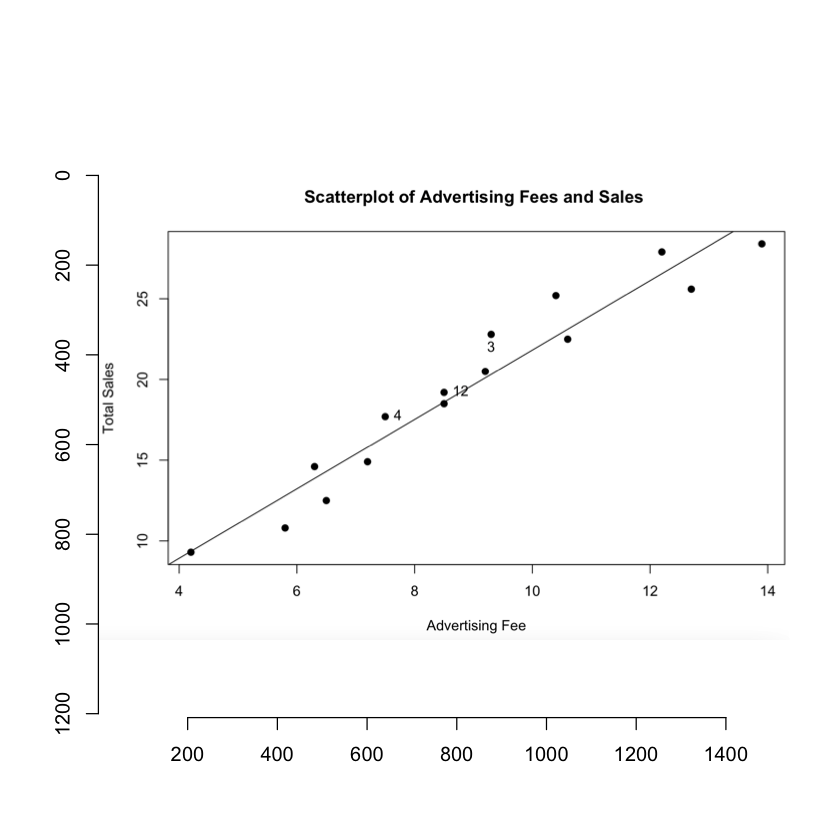

In [28]:
plot(load.image('./img/01.png'))

In [29]:
# 점 (x̄, ȳ) 는 적합된 회귀선상에 있음(즉 표본의 X평균과 Y평균은 회귀 직선(Ŷ)위에 존재)

In [30]:
xbar <- mean(market$X)
ybar <- mean(market$Y)
paste0('x̄ : ', xbar)
paste0('ȳ : ', ybar)

[1] "x̄ : 8.85333333333333"

[1] "ȳ : 19.36"

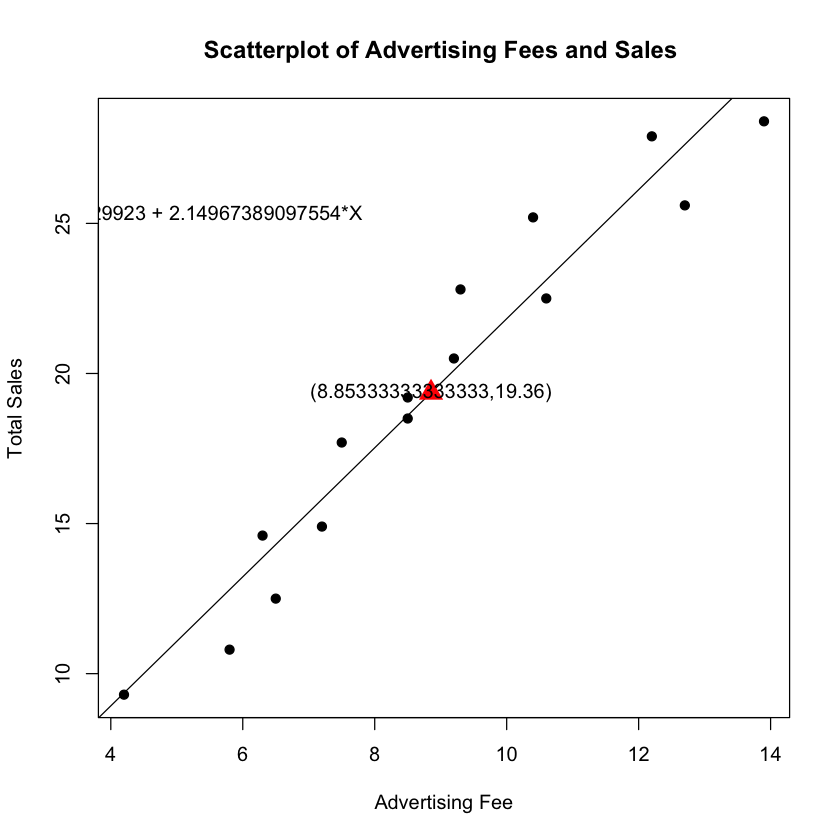

In [31]:
plot(market$X, market$Y, xlab='Advertising Fee', ylab='Total Sales', pch=19)
title("Scatterplot of Advertising Fees and Sales ")
abline(market.lm)
points(xbar, ybar, pch=17, cex=2.0, col='RED')
text(xbar, ybar, paste0('(', xbar, ',', ybar, ')'))
fx <- paste0('Y(hat) = ',β0,' + ',β1,'*X')
# 아래코드는 R studio에서만 동작(pycharm에서 동작안함)
# text(locator(1), fx)
# 그래서 그냥 랜덤으로 좌표찍어서 출력하게 변형시켰습니다.
x.min <- min(market$X)
x.max <- max(market$X)
y.min <- min(market$Y)
y.max <- max(market$Y)
x.pos <- sample(x=x.min:x.max, size=1)[1]
y.pos <- sample(x=y.min:y.max, size=1)[1]
text(x.pos, y.pos, fx)

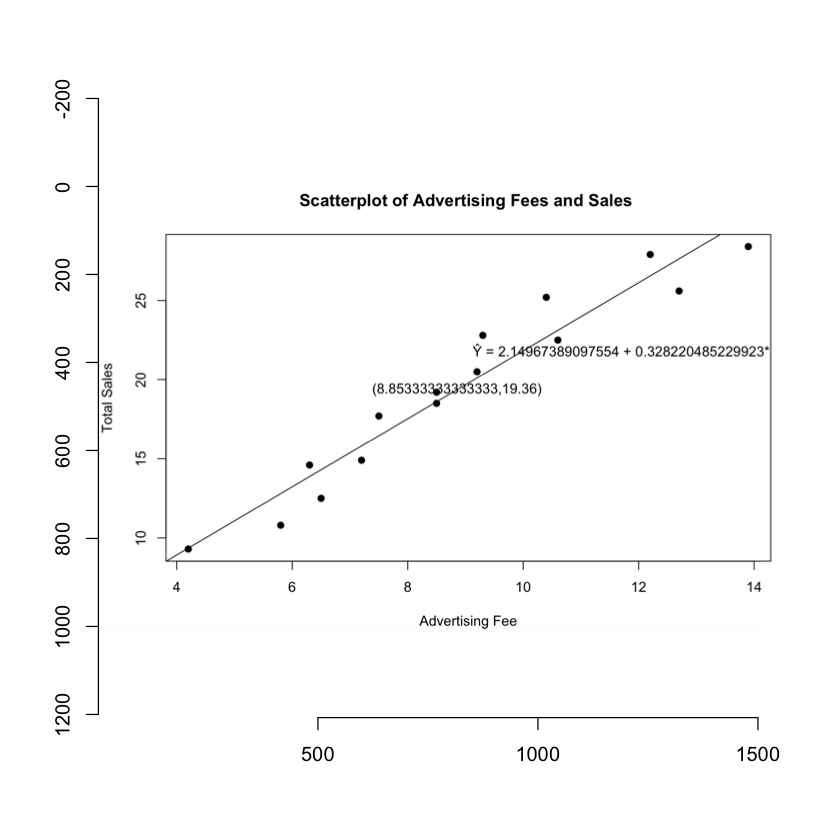

In [32]:
# text(locator(1), fx)
# 위 코드를 R studio에서 동작시키고 화살표로 찍으면 fx가 출력됩니다.
plot(load.image('./img/02.png'))

In [33]:
# 분산분석표
market.lm.anova <- anova(market.lm)
market.lm.anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,485.57264,485.572638,192.9033,3.553647e-09
Residuals,13,32.72336,2.517182,NA,NA


In [34]:
# p값이 0.05보다 작으니 귀무가설(H₀: β₁=0)을 기각합니다.
# β₁=0라는 의미는 기울기가 0이므로 회귀가 유의하지 않음을 의미한다.
# F₀=MSR/MSE

In [35]:
# F분포는 F𝛼(v1,v2)로 표시되며 ɑ는 유의확률, v1은 분모의 자유도, v2분자의 자유도입니다.
# 해당 anova 테이블에서 v1은 X(회귀:SSR)이며 v2는 Residuals(잔차:SSE)입니다.
v1 <- market.lm.anova[1,1]
v2 <- market.lm.anova[2,1]
ɑ <- 0.95
# 아래 식의 결과는 F 기각역의 값이다.
# 기각역 값은 F분포표를 인터넷 검색해서 확인해 볼 수 있다.
critical.region <- qf(ɑ, v1, v2)
# 아래는 귀무가설을 기각할 수 있는지 확인하는 식이다. 기각역 보다 F-value가 크면 기각할 수 있다.
f.value <- market.lm.anova[1,4]
critical.region <  f.value

[1] TRUE

In [36]:
# p-value로 비교할거면 아래처럼 할 수 있습니다.
1 - pf(f.value, v1, v2)
# 해당 계산값은 anova테이블에 이미 계산 되어 있습니다.
pr.f <- market.lm.anova[1,5]
pr.f
# 유의확률이 0.05이므로 해당 값 보다 작으면 기각할 수 있습니다.
pr.f < 0.05

[1] 3.553647e-09

[1] 3.553647e-09

[1] TRUE

In [37]:
# 결정계수 R² 회귀선의 유용성이 높은지 확인할 수 있다.
# R² = SSR/SST = 1 - (SSE/SST)
# 만약 R² = 0 이라면 모델 설명력이 0 이다.
# 만약 R² = 1 이라면 모델 설명력이 100% 이다.
# 따라서 R²가 100%에 가까울수록 모델의 설명력은 높아집니다.
# R²는 일반 R²이랑 adj.R²가 존재합니다. 뒤는 자유도를 보정한 R²인데 강의에서는 설명이 없습니다.

In [38]:
r.squared <- market.lm.summary$r.squared
adj.r.squared <- market.lm.summary$adj.r.squared
r.squared
adj.r.squared

[1] 0.9368636

[1] 0.9320069

In [39]:
# 추정값의 표준오차
# 표준오차가 작으면 참값에 더 가깝다.
# 표준오차가 크면 참값에서 더 멀다.
# 단독으로 쓰이진 않고 두 모델이 있을경우 어떤 모델이 더 적합한지 확인하는 척도로 쓴다.
# Sʏ.𝗑 = √MSE = √(SSE/(n-2))
std.err <- sqrt(market.lm.anova[2,3])
std.err

[1] 1.586563